In [1]:


import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import scipy

%matplotlib inline
from matplotlib import pyplot as plt



In [19]:
train_df = pd.read_csv('howpop_train.csv')
test_df = pd.read_csv('howpop_test.csv')

In [7]:
train_df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [11]:
pd.to_datetime('2008-01-02').value

1199232000000000000

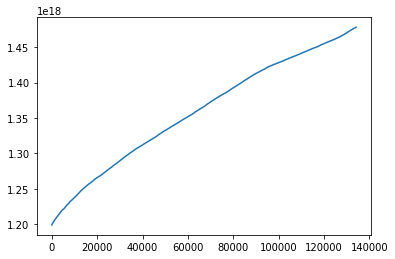

In [6]:
train_df['published'].apply(lambda ts: pd.to_datetime(ts).value).plot();


In [18]:
 pd.DataFrame.corr(df) > 0.9

,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,True,False,False,False,False,False,False,False,False,False,False
polling,False,True,False,False,False,False,False,False,False,False,False
content_len,False,False,True,False,False,False,False,False,False,False,False
comments,False,False,False,True,False,False,False,False,False,False,False
favs,False,False,False,False,True,False,False,False,False,False,False
views,False,False,False,False,False,True,False,False,False,False,False
votes_plus,False,False,False,False,False,False,True,False,False,False,False
votes_minus,False,False,False,False,False,False,False,True,False,False,False
views_lognorm,False,False,False,False,False,False,False,False,True,False,False
favs_lognorm,False,False,False,False,False,False,False,False,False,True,False


## Вопрос 2. В каком году было больше всего публикаций? (Рассматриваем train_df)

In [20]:
import datetime
df.head()

df['published'] = pd.to_datetime(df['published'])
df['published'] = df['published'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))

In [18]:
pd.value_counts(df['published'])

2015    23452
2016    16316
2014    16180
2012    15972
2013    15537
2011    15063
2010    13091
2009    10783
2008     7743
Name: published, dtype: int64

In [21]:


features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])



In [26]:
X, y = train_df.loc[:, features],  train_df['favs_lognorm'] #отделяем признаки от целевой переменной

X_test = test_df.loc[:, features]


In [29]:
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]

y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( min_df=3, max_df=0.3, ngram_range=(1, 3))
X_train_title = vectorizer.fit_transform(X_train['title'])
#print(vectorizer.get_feature_names())
X_valid_title = vectorizer.transform(X_valid['title']) 
X_test_title = vectorizer.transform(X_test['title'])# и тут тоже

print(X_train_title.shape)

(93895, 50624)


In [95]:
vectorizer.vocabulary_['python']

9065

In [87]:
vectorizer_ch = TfidfVectorizer(analyzer = 'char')
X_train_title_ch = vectorizer_ch.fit_transform(X_train['title'])
#print(vectorizer.get_feature_names())
X_valid_title_ch = vectorizer_ch.transform(X_valid['title']) 
X_test_title_ch = vectorizer_ch.transform(X_test['title'])# и тут тоже

print(X_train_title_ch.shape)

(93895, 218)


In [53]:
vectorizer_ch.vocabulary_

{' ': 0,
 '!': 1,
 '"': 2,
 '#': 3,
 '$': 4,
 '%': 5,
 '&': 6,
 "'": 7,
 '(': 8,
 ')': 9,
 '*': 10,
 '+': 11,
 ',': 12,
 '-': 13,
 '.': 14,
 '/': 15,
 '0': 16,
 '1': 17,
 '2': 18,
 '3': 19,
 '4': 20,
 '5': 21,
 '6': 22,
 '7': 23,
 '8': 24,
 '9': 25,
 ':': 26,
 ';': 27,
 '<': 28,
 '=': 29,
 '>': 30,
 '?': 31,
 '@': 32,
 '[': 33,
 '\\': 34,
 ']': 35,
 '^': 36,
 '_': 37,
 '`': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64,
 '{': 65,
 '|': 66,
 '}': 67,
 '~': 68,
 '\x92': 69,
 '\x97': 70,
 '\xa0': 71,
 '£': 72,
 '¥': 73,
 '§': 74,
 '©': 75,
 '«': 76,
 '\xad': 77,
 '®': 78,
 '°': 79,
 '±': 80,
 '²': 81,
 'µ': 82,
 '·': 83,
 '¹': 84,
 '»': 85,
 '¼': 86,
 '½': 87,
 '×': 88,
 'à': 89,
 'á': 90,
 'â': 91,
 'ä': 92,
 'ç': 93,
 'é': 94,
 'ë': 95,
 'ï': 96,
 'ñ': 97,
 'ò': 98,
 'ó': 9

In [73]:
feats = ['author', 'flow', 'domain']
X_train[feats][:5]

,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,NaN,geektimes.ru


In [74]:


# сначала заполняем пропуски прочерком
X_train[feats][:5].fillna('-')



,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,-,geektimes.ru


In [75]:


# Преобразуем датафрейм в словарь, где ключами являются индексы объектов (именно для этого мы транспонировали датафрейм),
# а значениями являются словари в виде 'название_колонки':'значение'
X_train[feats][:5].fillna('-').T.to_dict()



{0: {'author': '@Tapac', 'domain': 'habrahabr.ru', 'flow': 'develop'},
 1: {'author': '@DezmASter', 'domain': 'habrahabr.ru', 'flow': 'design'},
 2: {'author': '@DezmASter', 'domain': 'habrahabr.ru', 'flow': 'design'},
 3: {'author': '@Taoorus', 'domain': 'habrahabr.ru', 'flow': 'design'},
 4: {'author': '@dennydo', 'domain': 'geektimes.ru', 'flow': '-'}}

In [76]:
# В DictVectorizer нам нужно будет передать список словарей для каждого объекта в виде 'название_колонки':'значение',
# поэтому используем .values()
X_train[feats][:5].fillna('-').T.to_dict().values()

dict_values([{'author': '@Tapac', 'flow': 'develop', 'domain': 'habrahabr.ru'}, {'author': '@DezmASter', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@DezmASter', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@Taoorus', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@dennydo', 'flow': '-', 'domain': 'geektimes.ru'}])

In [98]:
# В итоге получается разреженная матрица
dict_vect = DictVectorizer()
dict_vect_matrix = dict_vect.fit_transform(X_train[feats][:5].fillna('-').T.to_dict().values())
print(dict_vect_matrix)

  (0, 2)	1.0
  (0, 5)	1.0
  (0, 8)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (1, 7)	1.0
  (2, 0)	1.0
  (2, 5)	1.0
  (2, 7)	1.0
  (3, 1)	1.0
  (3, 5)	1.0
  (3, 7)	1.0
  (4, 3)	1.0
  (4, 4)	1.0
  (4, 6)	1.0


In [99]:


# Но можно преобразовать ее в numpy array с помощью .toarray()
dict_vect_matrix.toarray()



array([[ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.]])

In [79]:


# В получившейся матрице 5 строк (по числу объектов) и 9 столбцов
# Далее разберемся почему колонок именно 9
dict_vect_matrix.shape



(5, 9)

In [80]:
for col in feats:
    print(col,len(X_train[col][:5].fillna('-').unique()))

author 4
flow 3
domain 2


In [81]:
# например, самая первая колонка называется 'author=@DezmASter' - то есть принимает значение 1 только если автор @DezmASter
dict_vect.feature_names_

['author=@DezmASter',
 'author=@Taoorus',
 'author=@Tapac',
 'author=@dennydo',
 'domain=geektimes.ru',
 'domain=habrahabr.ru',
 'flow=-',
 'flow=design',
 'flow=develop']

In [101]:
vectorizer_feats = DictVectorizer()#ваш код здесь

X_train_feats = vectorizer_feats.fit_transform(X_train[feats].fillna('-').T.to_dict().values())
X_valid_feats = vectorizer_feats.transform(X_valid[feats].fillna('-').T.to_dict().values())
X_test_feats = vectorizer_feats.transform(X_test[feats].fillna('-').T.to_dict().values())

In [102]:
X_train_feats.shape

(93895, 17869)

In [103]:
X_train_new = scipy.sparse.hstack([X_train_title, X_train_feats, X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title, X_valid_feats, X_valid_title_ch])
X_test_new =  scipy.sparse.hstack([X_test_title, X_test_feats, X_test_title_ch])

In [106]:
print(X_train_new)

  (0, 31497)	0.429633006908
  (0, 36257)	0.397009909025
  (0, 14241)	0.540985922797
  (0, 12172)	0.357357363735
  (0, 31499)	0.487266413199
  (1, 45476)	0.350802625136
  (1, 50489)	0.300041652833
  (1, 22661)	0.141666778063
  (1, 42745)	0.197937417181
  (1, 18811)	0.104467881046
  (1, 34225)	0.313162648794
  (1, 37373)	0.285171022249
  (1, 22833)	0.331781638369
  (1, 42751)	0.261899955468
  (1, 19413)	0.319881932924
  (1, 22834)	0.35802363029
  (1, 42753)	0.35802363029
  (2, 45476)	0.350802625136
  (2, 50489)	0.300041652833
  (2, 22661)	0.141666778063
  (2, 42745)	0.197937417181
  (2, 18811)	0.104467881046
  (2, 34225)	0.313162648794
  (2, 37373)	0.285171022249
  (2, 22833)	0.331781638369
  :	:
  (93893, 68635)	0.101629073065
  (93893, 68505)	0.117508530094
  (93893, 68631)	0.135266008268
  (93893, 68619)	0.100080662275
  (93893, 68633)	0.103378769045
  (93893, 68540)	0.145277083441
  (93893, 68545)	0.0800945255083
  (93893, 68544)	0.0940445864821
  (93893, 68543)	0.259156946549
  (938

In [109]:
%%time
model1 = Ridge(alpha=0.1, random_state = 1)
model1.fit(X_train_new, y_train)

train_preds1 = model1.predict(X_train_new)
valid_preds1 = model1.predict(X_valid_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте',mean_squared_error(y_valid, valid_preds1))



Ошибка на трейне 0.184107031582
Ошибка на тесте 0.902647554634
CPU times: user 17.2 s, sys: 40 ms, total: 17.2 s
Wall time: 18 s


In [111]:
%%time
model2 = Ridge(alpha=1, random_state = 1)
model2.fit(X_train_new, y_train)

train_preds2 = model2.predict(X_train_new)
valid_preds2 = model2.predict(X_valid_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте',mean_squared_error(y_valid, valid_preds2))


Ошибка на трейне 0.28624407471
Ошибка на тесте 0.701144627434
CPU times: user 6.55 s, sys: 12 ms, total: 6.56 s
Wall time: 6.33 s


при alpha=1.0 у модели обощающая способность лучше, чем у при alpha=0.1

## Baseline


In [113]:
%%time
model = Ridge()# ваш код здесь
X_all = scipy.sparse.vstack([X_train_new, X_valid_new])
# обучите модель на всех данных
model.fit(X_all, y)


CPU times: user 9.66 s, sys: 144 ms, total: 9.8 s
Wall time: 10.1 s


In [ ]:
X_train_new.shape, X_test_

In [114]:
test_preds = model.predict(X_test_new)

In [117]:
sample_submission = pd.read_csv('sample_submission(1).csv')



In [121]:
sample_submission.shape


(5405, 2)

In [122]:
test_preds.shape

(3990,)

In [119]:


ridge_submission = sample_submission.copy()
ridge_submission['favs_lognorm'] = test_preds
# это будет бейзлайн "Простое решение"
ridge_submission.to_csv('ridge_baseline.csv') 



ValueError: Length of values does not match length of index